In [7]:
import pandas as pd
col_names = ['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

cars = pd.read_table('auto-mpg.data.txt', delim_whitespace=True, header=None, names=col_names)

In [8]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


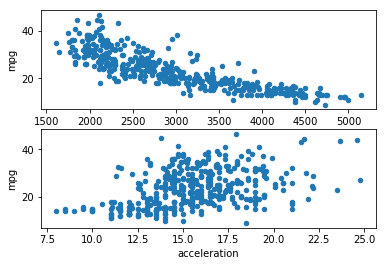

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

cars.plot(x='weight', y='mpg', kind='scatter', ax=ax1)
cars.plot(x='acceleration', y='mpg', kind='scatter', ax=ax2)

In [17]:
cars[["weight"]].values.shape

(398, 1)

### ARRAY TO MATRIX
Repeseting as ```cars[['weight']]``` gives a (398,1) matrix. If you do only ```cars['weight']``` this gives array of 398. Fit actually expects as matrix

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[['weight']], cars['mpg'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
predictions = lr.predict(cars[['weight']])
predictions[0:5]

array([ 19.41852276,  17.96764345,  19.94053224,  19.96356207,  19.84073631])

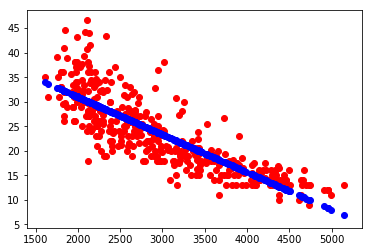

In [29]:
fig = plt.figure()

plt.scatter(cars['weight'], cars['mpg'], c='red')
plt.scatter(cars['weight'], predictions, c='blue')

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars['mpg'], predictions)
mse

18.780939734628394

In [31]:
from math import sqrt
rmse = sqrt(mse)
rmse

4.333698159150957

In [33]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data.txt", delim_whitespace=True, names=columns)

filtered_cars = cars[cars['horsepower'] != '?']
pd.to_numeric(filtered_cars['horsepower'], errors='coerce')
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype(float)
filtered_cars.head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


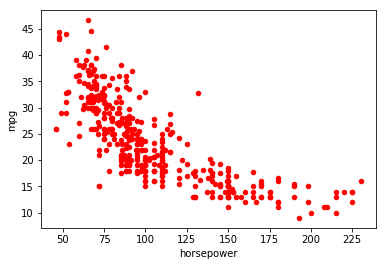

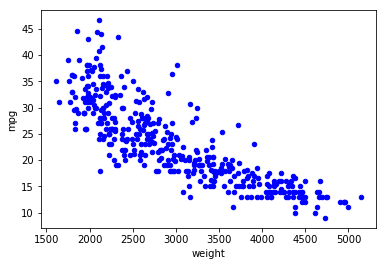

In [34]:
import matplotlib.pyplot as plt
filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red')
filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue')
plt.show()

In [37]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(filtered_cars[['horsepower']], filtered_cars['mpg'])
predictions = lr.predict(filtered_cars[['horsepower']])
print(predictions[0:5])
print(filtered_cars['mpg'][0:5])

[ 19.41604569  13.89148002  16.25915102  16.25915102  17.83759835]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


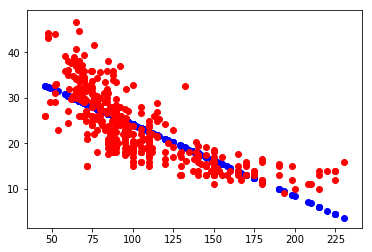

In [38]:
plt.scatter(filtered_cars['horsepower'], predictions, c='blue')
plt.scatter(filtered_cars['horsepower'], filtered_cars['mpg'], c='red')


In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(filtered_cars['mpg'], predictions)

rmse = mse ** (1/2)
rmse

4.8932262300657126

In [40]:
lr = LinearRegression()
lr.fit(filtered_cars[['weight','horsepower']], filtered_cars['mpg'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predictions = lr.predict(filtered_cars[['weight','horsepower']])

In [42]:
mse = mean_squared_error(filtered_cars['mpg'], predictions)

rmse = mse ** (1/2)
rmse

4.2239131670230385